# Benchmark analysis.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Import the data.
Note that you need to create the data first using the mazes Rust program. 

In [2]:
filename = "./maze_benchmark_size_45x45_25001_mazes_25_random_positions.csv"
benchmark_name = filename[2:-4]
print(benchmark_name)
df = pd.read_csv(filename, delimiter=';')
print(df.shape[0])
df.head(10)

maze_benchmark_size_45x45_25001_mazes_25_random_positions
1950078


,maze_id,generation_algorithm,manhattan_distance,path_length,A*,depth-first search,breadth-first search,greedy best-first search,A* weighted
0,6,Kruskal,84,145,499,603,752,241,441
1,6,Kruskal,3,6,7,7,11,7,7
2,6,Kruskal,35,82,326,341,414,138,221
3,6,Kruskal,21,26,47,63,71,26,28
4,6,Kruskal,32,69,261,357,393,111,155
5,6,Kruskal,47,128,616,573,767,191,401
6,6,Kruskal,19,92,281,138,424,300,243
7,6,Kruskal,15,160,863,453,952,520,667
8,6,Kruskal,51,60,154,598,272,142,112
9,6,Kruskal,40,69,259,667,371,93,168


In [3]:
generation_algorithms = df["generation_algorithm"].unique()
print("Generation algorithms: ", generation_algorithms)
for generation_algorithm in generation_algorithms:
    print(generation_algorithm, "number of entries:", df[df["generation_algorithm"] == generation_algorithm].shape[0])

Generation algorithms:  ['Kruskal' 'recursive backtracking' 'Wilson']
Kruskal number of entries: 650026
recursive backtracking number of entries: 650026
Wilson number of entries: 650026


In [4]:
solving_algorithms = [x for x in list(df.keys()) if x not in ["maze_id", "generation_algorithm", "manhattan_distance", "path_length"]]
print("Solving algorithms: ", solving_algorithms)

Solving algorithms:  ['A*', 'depth-first search', 'breadth-first search', 'greedy best-first search', 'A* weighted']


## Visualization.

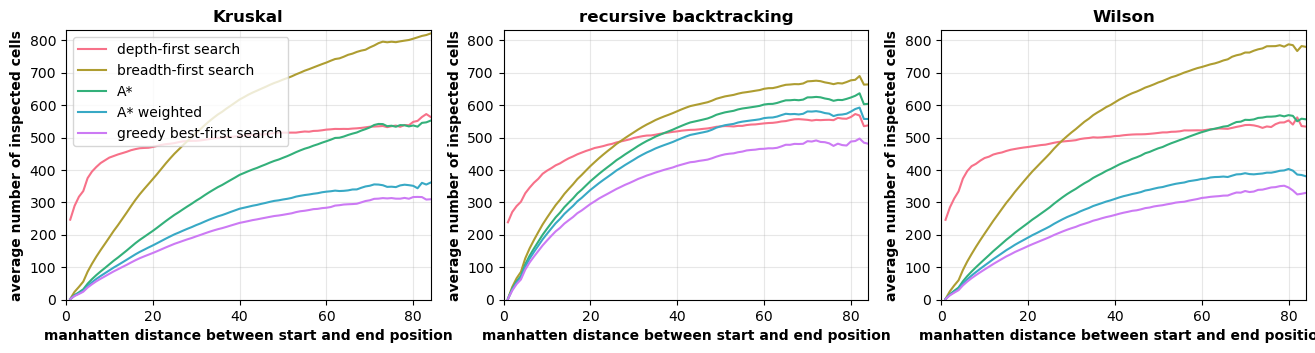

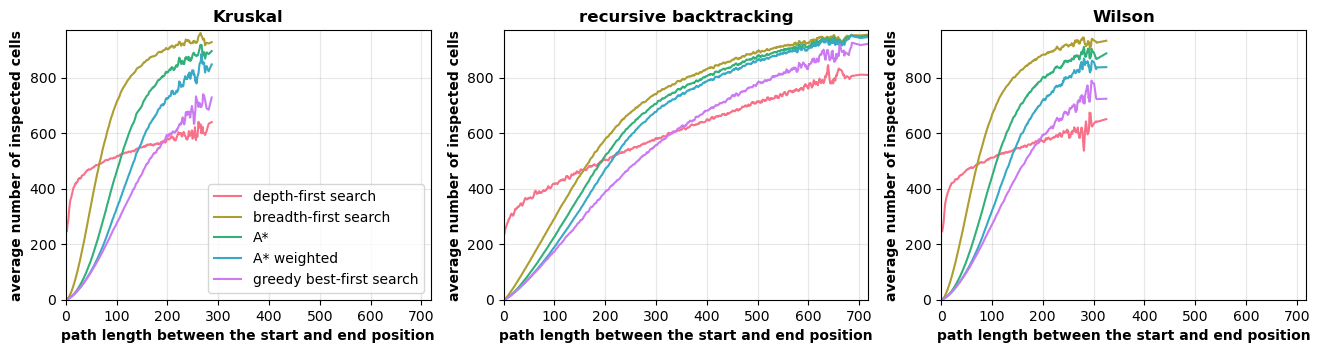

In [5]:
# We want a color palette to distinguish the different solving algorithms.
clrs = sns.color_palette("husl", len(solving_algorithms))

# Compare two different approaches. The first is to compare the number of inspected cells with the manhattan distance
# between the start and end position and the second one is to compare the number of inspected cells with the path length.
column_names = ["manhattan_distance", "path_length"]
x_labels = ["manhatten distance between start and end position", "path length between the start and end position"]

for idx_x, column_name in enumerate(column_names):
    fig, axes = plt.subplots(1, len(generation_algorithms), figsize=(16,3.5))
    y_max = 0 # for equal y ranges.
    for idx_gen, generation_algorithm in enumerate(generation_algorithms):
        ax = axes[idx_gen]
        # Filter only the current generation algorithm.
        df_generation_algorithm = df[df["generation_algorithm"] == generation_algorithm]
        # For all solving algorithms, calculate the statistic and plot it.
        # For specific order:
        solving_algorithms = ['depth-first search', 'breadth-first search', 'A*', 'A* weighted', 'greedy best-first search']
        for idx_sol, solving_algorithm in enumerate(solving_algorithms):
            # Calculate average and standard deviation
            df_stats = df_generation_algorithm.groupby(column_name)[solving_algorithm].agg(['mean']).reset_index()
            df_stats["mean"] = df_stats["mean"].rolling(window=4, min_periods=1).mean()
            y_max = max(y_max, df_stats["mean"].max())
            ax.plot(df_stats[column_name], df_stats["mean"], c=clrs[idx_sol], label=solving_algorithm)
        label_weight = "bold"
        ax.set_title(generation_algorithm, weight=label_weight)
        ax.set_xlabel(x_labels[idx_x], weight=label_weight)
        ax.set_ylabel("average number of inspected cells", weight=label_weight)
        xlim = [0, max(df[column_name])]
        ax.set_xlim(xlim)
        ax.grid(alpha=0.3)
        if idx_gen == 0:
            ax.legend()
    # Set equal y ranges.
    for ax in axes:
        ax.set_ylim([0, y_max + 10])
    plt.show()
    fig.savefig("./analysis_" + column_name + "_" + benchmark_name + ".png", bbox_inches="tight")